

<font size="10">The Ultimate Classifier </font></h1>


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standardize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-09-09 21:26:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-09-09 21:26:53 (148 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [4]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-09-09 21:26:53--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-09-09 21:26:54 (1.07 GB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Data From CSV File


In [5]:
df1 = pd.read_csv('loan_train.csv')
df1.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
df2 = pd.read_csv('loan_test.csv')
df2.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [7]:
print(df1.shape)
print(df2.shape)

(346, 10)
(54, 10)


In [8]:
df=pd.concat([df1,df2])

In [9]:
df.shape

(400, 10)

### Convert to date time object


In [10]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [11]:
df['loan_status'].value_counts()

PAIDOFF       300
COLLECTION    100
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


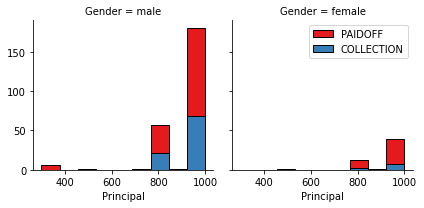

In [12]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

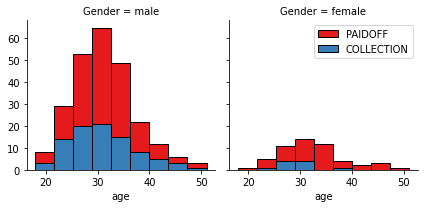

In [13]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


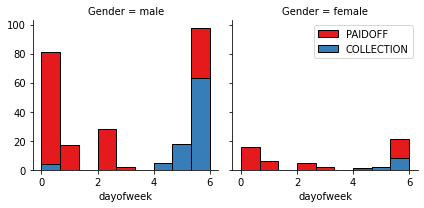

In [14]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [15]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [16]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.841270
        COLLECTION     0.158730
male    PAIDOFF        0.732938
        COLLECTION     0.267062
Name: loan_status, dtype: float64

84 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [17]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [18]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [19]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)
# Paidoff =1
# Collection =0

education             loan_status
Bechalor              1              0.788462
                      0              0.211538
High School or Below  1              0.715116
                      0              0.284884
Master or Above       1              0.750000
                      0              0.250000
college               1              0.773256
                      0              0.226744
Name: loan_status, dtype: float64

We see that all four types of education have significant number of both cases , so using all in the model

#### Features before One Hot Encoding


In [20]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [21]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


### Feature Selection


Let's define feature sets, X:


In [22]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


What are our lables?


In [23]:
Y = df['loan_status'].values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [24]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.50130175,  0.92089421,  2.31334964, -0.43236977, -1.21838912,
        -0.38655567,  1.15133896, -0.10050378, -0.86855395],
       [ 0.50130175,  0.92089421,  0.32194392,  2.31283513, -1.21838912,
         2.5869495 , -0.86855395, -0.10050378, -0.86855395],
       [ 0.50130175, -0.9332552 , -0.67375893, -0.43236977, -1.21838912,
        -0.38655567, -0.86855395, -0.10050378,  1.15133896],
       [ 0.50130175,  0.92089421, -0.50780846,  2.31283513,  0.82075585,
        -0.38655567, -0.86855395, -0.10050378,  1.15133896],
       [ 0.50130175,  0.92089421, -0.34185798, -0.43236977,  0.82075585,
        -0.38655567, -0.86855395, -0.10050378,  1.15133896]])

In [25]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['COLLECTION', 'PAIDOFF']); ax.yaxis.set_ticklabels(['COLLECTION', 'PAIDOFF'])

# **Train Test Split**


Use the function train_test_split to split the data X and Y into training and test data.<br>
Set the parameter test_size to 0.25 and random_state to 2.<br>
Random state is a model hyperparameter used to control the randomness involved in model <br>
<br>
X_train, X_test, Y_train, Y_test

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (320, 9) (320,)
Test set: (80, 9) (80,)


In [27]:
Y_test.shape    # 25% of Original DataSet is used for testing predicted values 
Y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

#   **Logistic Regression**

In [28]:
parameters = { 'C':[0.01,0.1,1],  'penalty':['l2'], 'solver':['lbfgs'] }

## Training the Logistic Regression Model

In [29]:
# If Hyperparameters Not Required , we can use this :
# lr=LogisticRegression()
# lr.fit(X_train,Y_train)

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}  # l1 lasso l2 ridge
lr=LogisticRegression()
lr_clf = GridSearchCV(lr,parameters,cv=10)   # cv means Cross-Validation 
lr_clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [30]:
GridSearchCV_Result=pd.DataFrame(lr_clf.cv_results_)
GridSearchCV_Result[["param_C","param_penalty","mean_test_score"]]

,param_C,param_penalty,mean_test_score
0,0.01,l2,0.753125
1,0.1,l2,0.753125
2,1,l2,0.734375


We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params\_ and the accuracy on the validation data using the data attribute best_score\_.

In [31]:
print("tuned hpyerparameters :(best parameters) ",lr_clf.best_params_)
print("accuracy :",lr_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.753125


## Testing the Logistic Regression Model

In [32]:
Logistic_Regression_Accuracy=lr_clf.score(X_test, Y_test)
print("test set accuracy :",Logistic_Regression_Accuracy)

test set accuracy : 0.7375


## Confusion Matrix

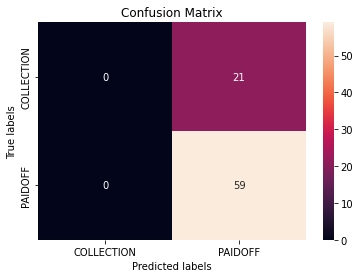

In [33]:
yhat=lr_clf.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the major problem is false positives

# **Support Vector Machine** <BR>
Create a support vector machine object then create a GridSearchCV object svm_cv with cv - 5. Fit the object to find the best parameters from the dictionary parameters.

In [34]:
parameters = {'kernel':('linear','sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
              
svm = SVC()   # Creating instance Of SVM model

## Training the SVM Model

In [35]:
svm_clf = GridSearchCV(svm,parameters,cv=2)
svm_clf.fit(X_train, Y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'sigmoid')})

In [36]:
GridSearchCV_Result=pd.DataFrame(svm_clf.cv_results_)
GridSearchCV_Result.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001837,0.000432,0.001104,0.000013,0.001,0.001,linear,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",0.75625,0.75,0.753125,0.003125,1
1,0.001436,0.000341,0.001092,0.000283,0.001,0.001,sigmoid,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.75625,0.75,0.753125,0.003125,1
2,0.000858,0.000016,0.000577,0.000029,0.001,0.031623,linear,"{'C': 0.001, 'gamma': 0.03162277660168379, 'ke...",0.75625,0.75,0.753125,0.003125,1


In [37]:
print(GridSearchCV_Result[["param_kernel","param_C","param_gamma","mean_test_score"]] )

   param_kernel    param_C param_gamma  mean_test_score
0        linear      0.001       0.001         0.753125
1       sigmoid      0.001       0.001         0.753125
2        linear      0.001    0.031623         0.753125
3       sigmoid      0.001    0.031623         0.753125
4        linear      0.001         1.0         0.753125
5       sigmoid      0.001         1.0         0.753125
6        linear      0.001   31.622777         0.753125
7       sigmoid      0.001   31.622777         0.753125
8        linear      0.001      1000.0         0.753125
9       sigmoid      0.001      1000.0         0.753125
10       linear   0.031623       0.001         0.753125
11      sigmoid   0.031623       0.001         0.753125
12       linear   0.031623    0.031623         0.753125
13      sigmoid   0.031623    0.031623         0.753125
14       linear   0.031623         1.0         0.753125
15      sigmoid   0.031623         1.0         0.753125
16       linear   0.031623   31.622777         0

In [38]:
print("tuned hyperparameters :(best parameters) ",svm_clf.best_params_)
print("accuracy :",svm_clf.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.753125


## Testing the SVM Model

In [39]:
SVM_Accuracy=svm_clf.score(X_test, Y_test)
print("test set accuracy :",SVM_Accuracy)

test set accuracy : 0.7375


## Confusion Matrix

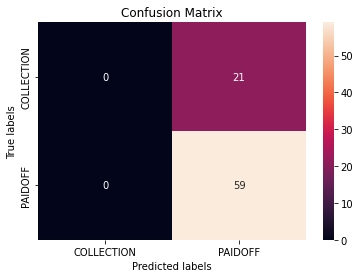

In [40]:
yhat=svm_clf.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# **Decision Tree**<br>
Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [41]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,15)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

## Training the Decision Tree Model

In [42]:
dt_clf = GridSearchCV(tree,parameters,cv=10)
dt_clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                       24, 26, 28],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [43]:
GridSearchCV_Result=pd.DataFrame(dt_clf.cv_results_)
GridSearchCV_Result.columns
GridSearchCV_Result[['param_criterion', 'param_max_depth', 'param_max_features',
       'param_min_samples_leaf', 'param_min_samples_split', 'param_splitter','mean_test_score']]

,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,mean_test_score
0,gini,2,auto,1,2,best,0.753125
1,gini,2,auto,1,2,random,0.753125
2,gini,2,auto,1,5,best,0.753125
3,gini,2,auto,1,5,random,0.753125
4,gini,2,auto,1,10,best,0.753125
...,...,...,...,...,...,...,...
1003,entropy,28,sqrt,4,2,random,0.715625
1004,entropy,28,sqrt,4,5,best,0.687500
1005,entropy,28,sqrt,4,5,random,0.693750
1006,entropy,28,sqrt,4,10,best,0.690625


In [44]:
print("tuned hpyerparameters :(best parameters) ",dt_clf.best_params_)
print("accuracy :",dt_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.75625


## Testing the Decision Tree Model

In [45]:
DecisionTree_Accuracy=dt_clf.score(X_test, Y_test)
print("test set accuracy :",DecisionTree_Accuracy)

test set accuracy : 0.7625


## Confusion matrix

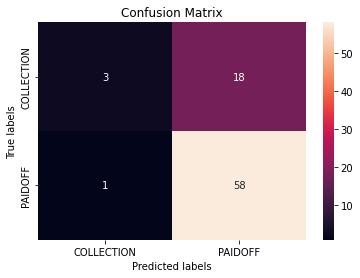

In [46]:
yhat = dt_clf.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# **k - Nearest Neighbor**<br>
Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [47]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

## Training the KNN Model


In [48]:
knn_clf = GridSearchCV(KNN,parameters,cv=10)
knn_clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'p': [1, 2]})

In [49]:
print("tuned hpyerparameters :(best parameters) ",knn_clf.best_params_)
print("accuracy :",knn_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'brute', 'n_neighbors': 11, 'p': 2}
accuracy : 0.725


## Testing the KNN Model

In [50]:
KNN_Accuracy=knn_clf.score(X_test, Y_test);
print("test set accuracy :",KNN_Accuracy)

test set accuracy : 0.775


## Confusion matrix

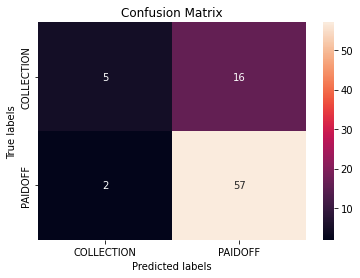

In [51]:
yhat = knn_clf.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# **Performance Analysis**

In [52]:
print('Accuracy for Logistics Regression method:', Logistic_Regression_Accuracy)
print( 'Accuracy for Support Vector Machine method:', SVM_Accuracy)
print('Accuracy for Decision tree method:', DecisionTree_Accuracy)
print('Accuracy for K nearest neighbors method:', KNN_Accuracy)

Accuracy for Logistics Regression method: 0.7375
Accuracy for Support Vector Machine method: 0.7375
Accuracy for Decision tree method: 0.7625
Accuracy for K nearest neighbors method: 0.775


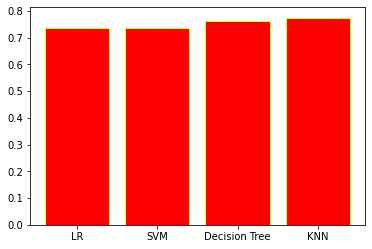

In [57]:
import matplotlib.pyplot as plt
X=["LR","SVM","Decision Tree","KNN"]
Y=[Logistic_Regression_Accuracy,SVM_Accuracy,DecisionTree_Accuracy, KNN_Accuracy]
plt.bar(X,Y,color="red",edgecolor="Yellow")
plt.show()

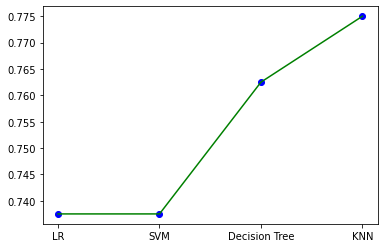

In [58]:
plt.scatter(X,Y,color="blue")
plt.plot(X,Y,color="green")
plt.show()